## Credit card Fraud Detection (Handling Imbalanced dataset using ML)

# Loading Dataset

In [1]:
#pip install pandas


In [2]:
import pandas as pd
df=pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.shape

(284807, 31)

In [4]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [5]:
#statistical info
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.758743e-12,-8.252298e-13,-9.636929e-13,8.316157e-13,1.591952e-13,4.247354e-13,-3.050180e-13,8.693344e-14,-1.179712e-12,...,-3.406543e-13,-5.713163e-13,-9.725303e-13,1.464139e-12,-6.989087e-13,-5.615260e-13,3.332112e-12,-3.518886e-12,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
#datatype info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

# Preprocessing the Dataset

In [7]:
#check the null values
df.isnull().sum()


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
#df.dropna()

In [9]:
import matplotlib.pyplot as plt

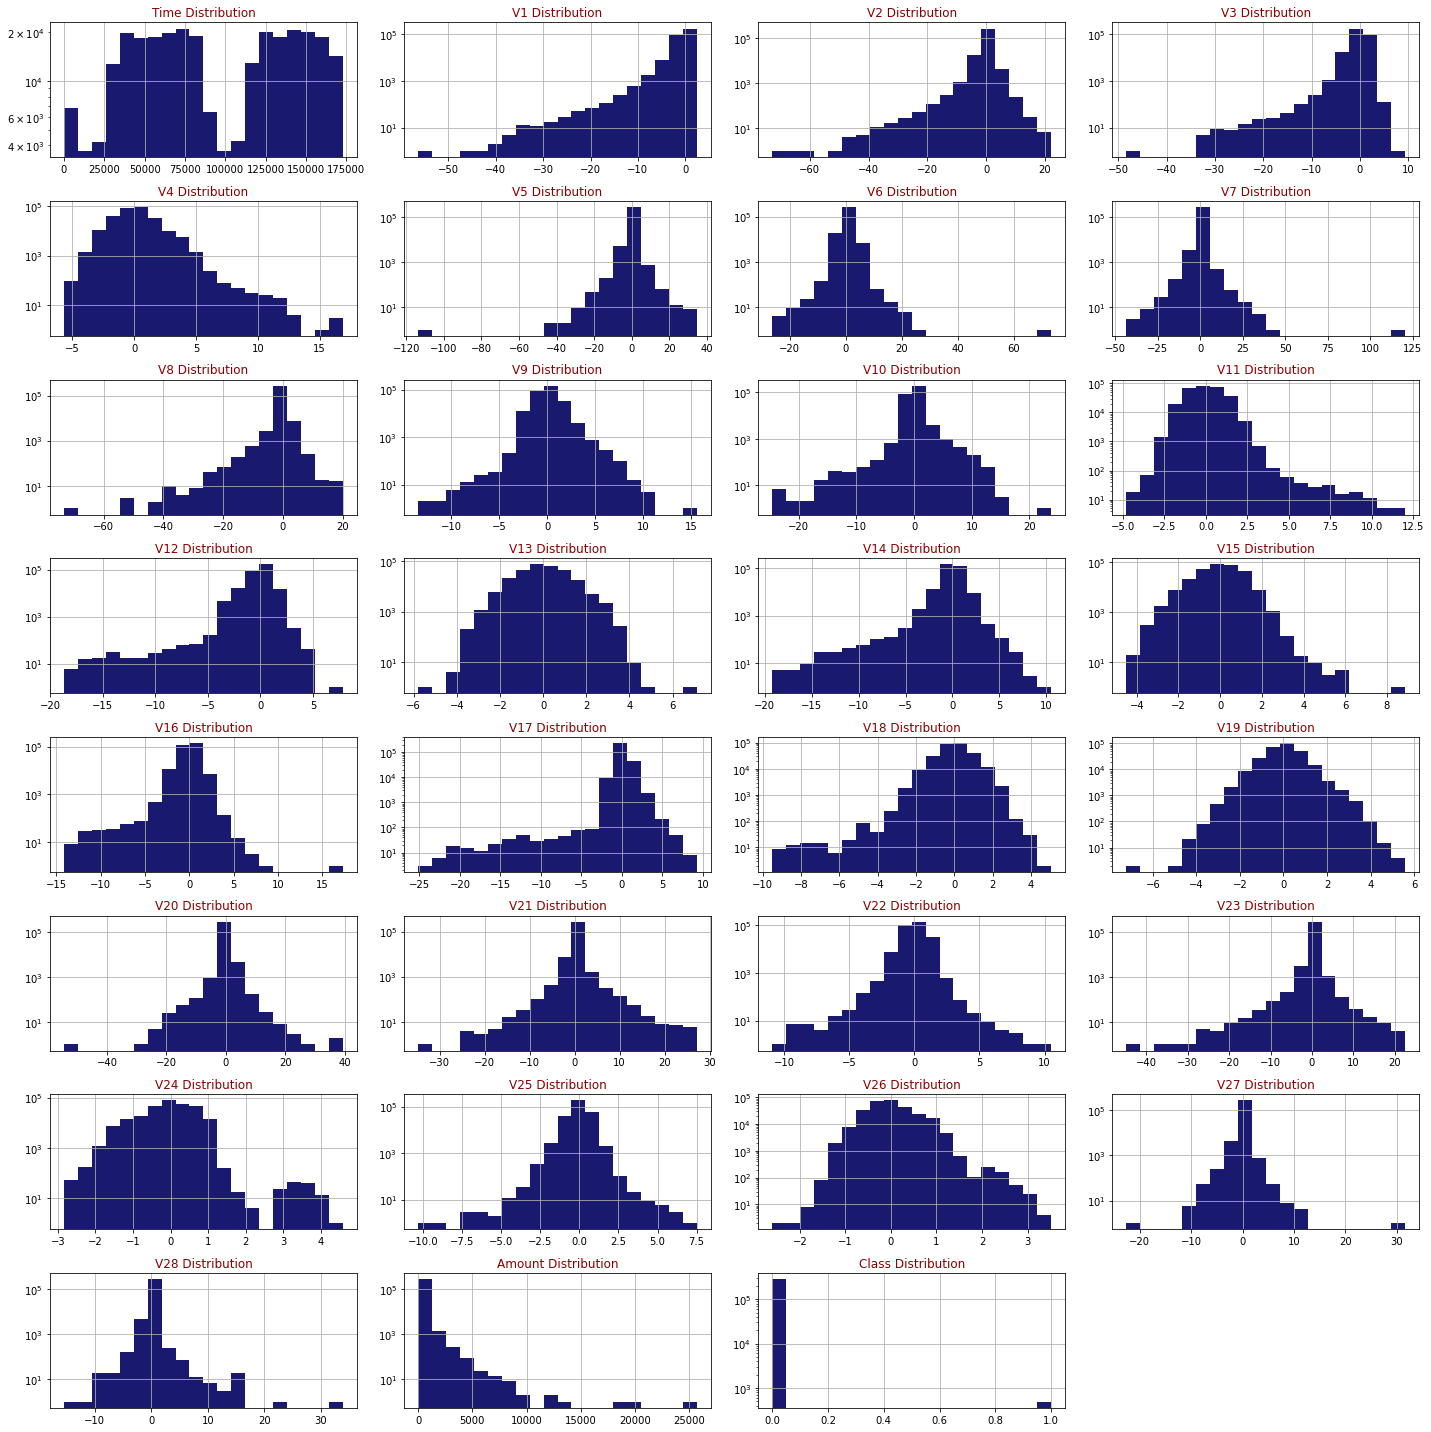

In [10]:
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='midnightblue')
        ax.set_title(feature+" Distribution",color='DarkRed')
        ax.set_yscale('log')
    fig.tight_layout()  
    plt.show()
    
def draw_roc_curve_RF(model, x_test_roc, y_test_roc, label = None):
    y_scores = model.predict_proba(X_test)
    fpr, tpr, thresholds = roc_curve(y_test_roc, y_scores[:,1])
    plt.figure(figsize=(8, 6)) 
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') 
    plt.axis([0, 1, 0, 1])                                    
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)    
    plt.grid(True)  
    


draw_histograms(df,df.columns,8,4)

In [11]:
#### Independent and Dependent Features
X=df.drop("Class",axis=1)
y=df.Class

Text(0.5, 1.0, 'Correlation')

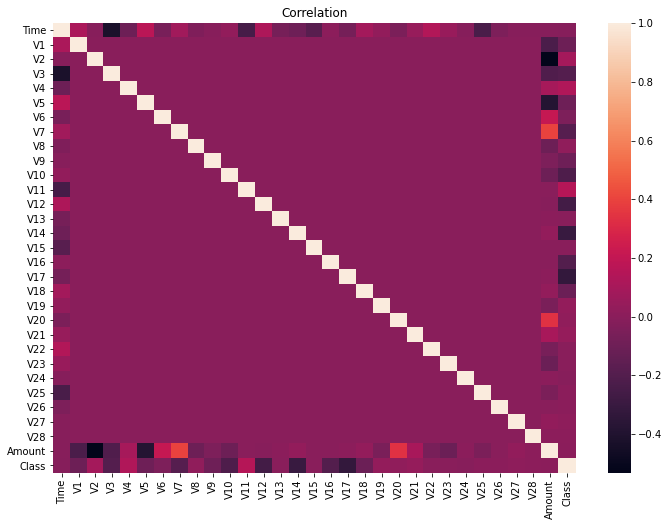

In [12]:
%matplotlib inline
import seaborn as sns
a4_dims = (11.7, 8.27)

fig, ax = plt.subplots(figsize=a4_dims)
sns.heatmap(df.corr())
ax.set_title('Correlation')

## Sklearn Library installing

In [13]:
#pip install scikit-learn

# Logistic Regression

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report, roc_curve, roc_auc_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict
import numpy as np
from sklearn.model_selection import GridSearchCV

In [15]:
def draw_roc_curve(model, x_train_roc, y_train_roc, label = None):
    y_scores = cross_val_predict(model, x_train_roc, y_train_roc, cv=3,method="decision_function")
    fpr, tpr, thresholds = roc_curve(y_train_roc, y_scores)
    plt.figure(figsize=(8, 6)) 
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') 
    plt.axis([0, 1, 0, 1])                                    
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)    
    plt.grid(True)  

In [16]:
log_class=LogisticRegression()
grid={'C':10.0 **np.arange(-2,3),'penalty':['l1','l2']}
cv=KFold(n_splits=5,random_state=None,shuffle=False)

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X.values,y.values,train_size=0.75)
#X_train = X_train.dropna()
#y_train = y_train.dropna()
#X_test = X_test.dropna()
#y_test = y_test.dropna()

In [18]:
clf=GridSearchCV(log_class,grid,cv=cv,n_jobs=-1,scoring='f1_macro')
clf.fit(X_train,y_train)

C:\Users\ayesh\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.82838542        nan 0.83260732        nan 0.8482212
        nan 0.8321769         nan 0.83786456]
  warnings.warn(
C:\Users\ayesh\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'penalty': ['l1', 'l2']},
             scoring='f1_macro')

In [19]:
y_pred=clf.predict(X_test)

In [20]:
import seaborn as sns

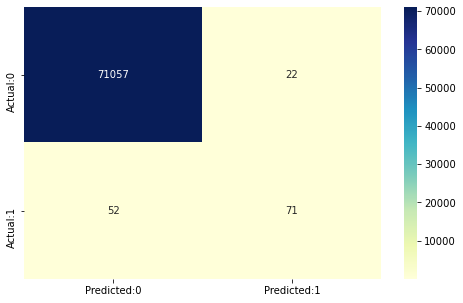

In [21]:
# confusion Matrix
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu");

In [22]:
print(accuracy_score(y_test,y_pred))

0.9989607033510295


In [23]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.76      0.58      0.66       123

    accuracy                           1.00     71202
   macro avg       0.88      0.79      0.83     71202
weighted avg       1.00      1.00      1.00     71202



C:\Users\ayesh\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.827721          nan 0.81788299        nan 0.84351203
        nan 0.83593301        nan 0.82122434]
  warnings.warn(
C:\Users\ayesh\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ayesh\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.82

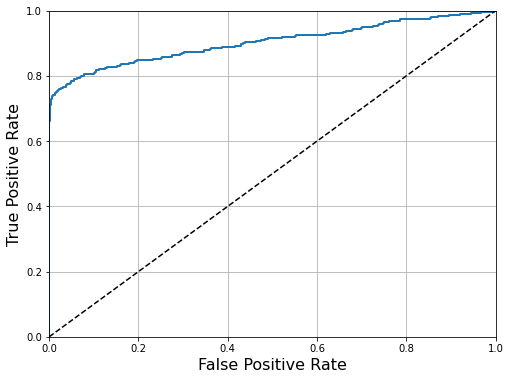

In [24]:
draw_roc_curve(clf, X_train, y_train, label = None)

In [25]:
2*0.69*0.72/(0.72+0.69)

0.7046808510638298

# Logistic Regression with Under Sampling

In [26]:
from imblearn.under_sampling import RandomUnderSampler

u_sample_lr = RandomUnderSampler(sampling_strategy=0.7)
X_train_under_lr,y_train_under_lr = u_sample_lr.fit_resample(X_train , y_train)

In [27]:
clf=GridSearchCV(log_class,grid,cv=cv,n_jobs=-1,scoring='f1_macro')
clf.fit(X_train_under_lr,y_train_under_lr)

C:\Users\ayesh\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.54503122        nan 0.53932377        nan 0.53329631
        nan 0.5402206         nan 0.54051368]
  warnings.warn(


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'penalty': ['l1', 'l2']},
             scoring='f1_macro')

In [28]:
y_pred=clf.predict(X_test)

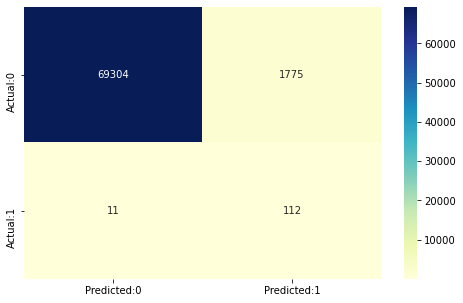

In [29]:
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu");

In [30]:
print(accuracy_score(y_test,y_pred))

0.9749164349316031


In [31]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     71079
           1       0.06      0.91      0.11       123

    accuracy                           0.97     71202
   macro avg       0.53      0.94      0.55     71202
weighted avg       1.00      0.97      0.99     71202



C:\Users\ayesh\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.55892569        nan 0.5449818         nan 0.5387668
        nan 0.53790127        nan 0.5441498 ]
  warnings.warn(
C:\Users\ayesh\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.65157984        nan 0.54536458        nan 0.53840681
        nan 0.55832259        nan 0.55697333]
  warnings.warn(
C:\Users\ayesh\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.55165173        nan 0.54967501        nan 0.5476473
        nan 0.54999093        nan 0.5482072 ]
  warnings.warn(


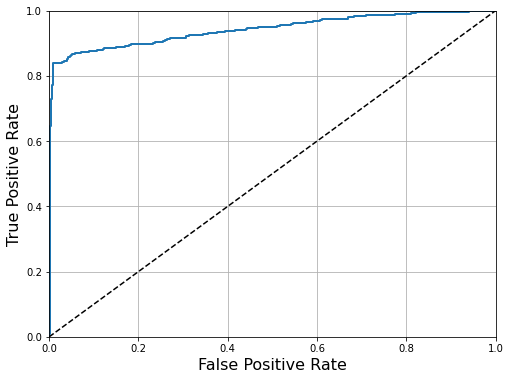

In [32]:
draw_roc_curve(clf, X_train_under_lr, y_train_under_lr, label = None)

# Logistic Regression with Over Sampling

In [33]:
from imblearn.over_sampling import RandomOverSampler

o_sample_lr = RandomOverSampler(sampling_strategy=0.8)
X_train_over_lr,y_train_over_lr = o_sample_lr.fit_resample(X_train , y_train)

In [34]:
clf=GridSearchCV(log_class,grid,cv=cv,n_jobs=-1,scoring='f1_macro')
clf.fit(X_train_over_lr,y_train_over_lr)

C:\Users\ayesh\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.57702621        nan 0.57573718        nan 0.57632119
        nan 0.57632119        nan 0.57553908]
  warnings.warn(
C:\Users\ayesh\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'penalty': ['l1', 'l2']},
             scoring='f1_macro')

In [35]:
y_pred=clf.predict(X_test)

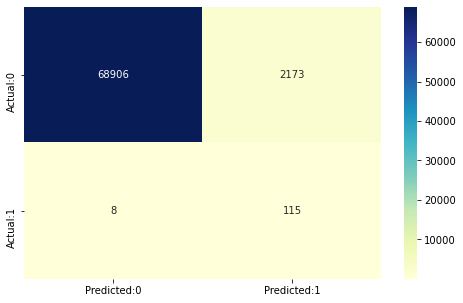

In [36]:
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu");

In [37]:
print(accuracy_score(y_test,y_pred))

0.9693688379539901


In [38]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98     71079
           1       0.05      0.93      0.10       123

    accuracy                           0.97     71202
   macro avg       0.53      0.95      0.54     71202
weighted avg       1.00      0.97      0.98     71202



C:\Users\ayesh\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.56568           nan 0.56520201        nan 0.565055
        nan 0.56457933        nan 0.56472432]
  warnings.warn(
C:\Users\ayesh\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.58808524        nan 0.58161014        nan 0.58583188
        nan 0.58651391        nan 0.58565936]
  warnings.warn(
C:\Users\ayesh\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.5799046         nan 0.57873836        nan 0.57726566
        nan 0.57803746        nan 0.57879207]
  warnings.warn(


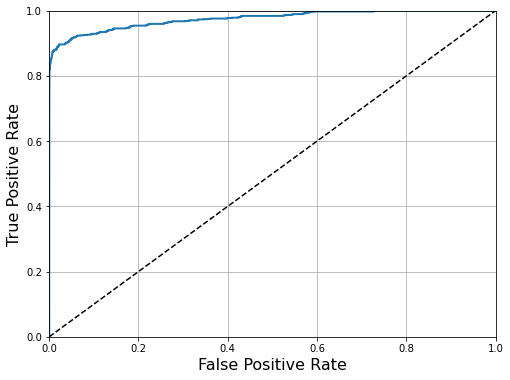

In [39]:
draw_roc_curve(clf, X_train_over_lr, y_train_over_lr, label = None)

# Random Forest Classifier :

In [40]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators=400, max_features='auto',criterion='gini', max_depth=10, min_samples_split=5, min_samples_leaf=1)
classifier.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, min_samples_split=5, n_estimators=400)

In [41]:
y_pred=classifier.predict(X_test)

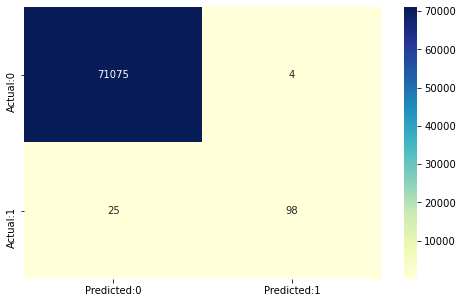

In [42]:
# confusion Matrix
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu");

In [43]:
print(accuracy_score(y_test,y_pred))

0.999592708069998


In [44]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.96      0.80      0.87       123

    accuracy                           1.00     71202
   macro avg       0.98      0.90      0.94     71202
weighted avg       1.00      1.00      1.00     71202



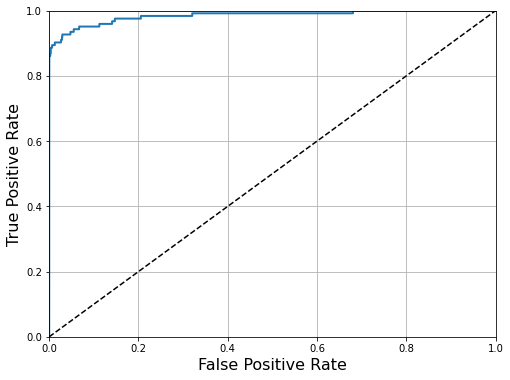

In [45]:
draw_roc_curve_RF(classifier, X_test, y_test, label = None)

# Random Forest with Under Sampling

Let's find out the best strategy for sampling

In [46]:
import time
t0=time.time()
k=0.5
while k<=1:
    u_sample = RandomUnderSampler(sampling_strategy=k)
    X_train_under,y_train_under = u_sample.fit_resample(X_train,y_train)
    c0=X_train_under[y_train_under==0]
    c1=X_train_under[y_train_under==1]
    print(len(c0),len(c1))
    classifier=RandomForestClassifier(n_estimators=400, max_features='auto',criterion='gini', max_depth=10, min_samples_split=5, min_samples_leaf=1)
    classifier.fit(X_train_under,y_train_under)
    #adap=RandomForestClassifier(n_estimators=10)
    #adap=AdaBoostClassifier(base_estimator=clfsm,n_estimators=10)
    #adap.fit(Xtrsm,ytrsm)
    pred=classifier.predict(X_test)
    print("K=",k)
    print("\nCONFUSION METRICS\n",confusion_matrix(y_test,pred))
    print("\nCLASSIFICATION REPORT\n",classification_report(y_test,pred))
    tn=time.time()-t0
    print(tn)
    print("-"*100)
    k=k+0.1

738 369
K= 0.5

CONFUSION METRICS
 [[70349   730]
 [   13   110]]

CLASSIFICATION REPORT
               precision    recall  f1-score   support

           0       1.00      0.99      0.99     71079
           1       0.13      0.89      0.23       123

    accuracy                           0.99     71202
   macro avg       0.57      0.94      0.61     71202
weighted avg       1.00      0.99      0.99     71202

3.337026834487915
----------------------------------------------------------------------------------------------------
615 369
K= 0.6

CONFUSION METRICS
 [[70287   792]
 [   13   110]]

CLASSIFICATION REPORT
               precision    recall  f1-score   support

           0       1.00      0.99      0.99     71079
           1       0.12      0.89      0.21       123

    accuracy                           0.99     71202
   macro avg       0.56      0.94      0.60     71202
weighted avg       1.00      0.99      0.99     71202

6.610699653625488
-----------------------------

So k = 0.7 is the best strategy because we want to keep the false negative as minimum as possible.

In [47]:
u_sample_rf = RandomUnderSampler(sampling_strategy=0.7)
X_train_under_rf,y_train_under_rf = u_sample_rf.fit_resample(X_train,y_train)
    
classifier=RandomForestClassifier(n_estimators=400, max_features='auto',criterion='gini', max_depth=10, min_samples_split=5, min_samples_leaf=1)
classifier.fit(X_train_under_rf,y_train_under_rf)

RandomForestClassifier(max_depth=10, min_samples_split=5, n_estimators=400)

In [48]:
y_pred=classifier.predict(X_test)

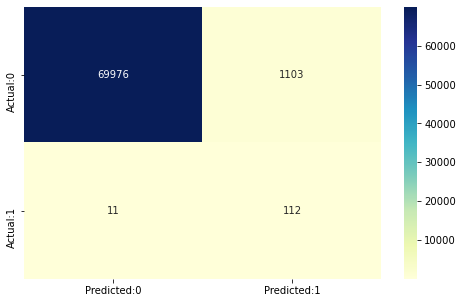

In [49]:
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu");

In [50]:
print(accuracy_score(y_test,y_pred))

0.9843543720682003


In [51]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     71079
           1       0.09      0.91      0.17       123

    accuracy                           0.98     71202
   macro avg       0.55      0.95      0.58     71202
weighted avg       1.00      0.98      0.99     71202



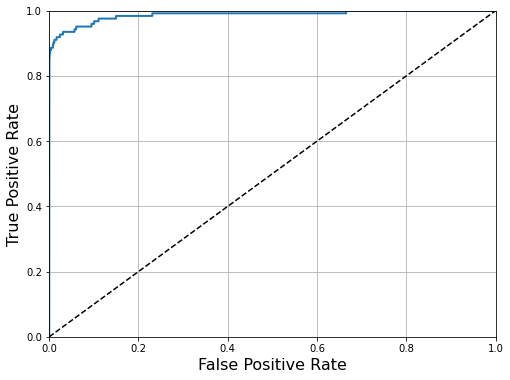

In [52]:
draw_roc_curve_RF(classifier, X_test, y_test, label = None)

# Random Forest with SMOTE

In [53]:
from imblearn.over_sampling import SMOTE
import time

In [ ]:
t0=time.time()
k=0.5
while k<=1:
    o_sample = SMOTE(sampling_strategy=k)
    X_train_over,y_train_over = o_sample.fit_resample(X_train,y_train)
    c0=X_train_over[y_train_over==0]
    c1=X_train_over[y_train_over==1]
    print(len(c0),len(c1))
    classifier=RandomForestClassifier(n_estimators=800, max_features='auto',criterion='gini', max_depth=10, min_samples_split=5, min_samples_leaf=1)
    classifier.fit(X_train_over,y_train_over)
    #adap=RandomForestClassifier(n_estimators=10)
    #adap=AdaBoostClassifier(base_estimator=clfsm,n_estimators=10)
    #adap.fit(Xtrsm,ytrsm)
    pred=classifier.predict(X_test)
    print("K=",k)
    print("\nCONFUSION METRICS\n",confusion_matrix(y_test,pred))
    print("\nCLASSIFICATION REPORT\n",classification_report(y_test,pred))
    tn=time.time()-t0
    print(tn)
    print("-"*100)
    k=k+0.1

213236 106618


Here the best strategy is k = 0.79

In [ ]:
o_sample_rf = SMOTE(sampling_strategy=0.79, random_state=4002)
X_train_over_rf,y_train_over_rf = o_sample_rf.fit_resample(X_train,y_train)
    
classifier=RandomForestClassifier(n_estimators=800, max_features='auto',criterion='gini', max_depth=10, min_samples_split=5, min_samples_leaf=1)
classifier.fit(X_train_over_rf,y_train_over_rf)

In [ ]:
y_pred=classifier.predict(X_test)

In [ ]:
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu");

In [ ]:
print(accuracy_score(y_test,y_pred))

In [ ]:
print(classification_report(y_test,y_pred))

In [ ]:
draw_roc_curve_RF(classifier, X_test, y_test, label = None)

# XGBoost

In [ ]:
from xgboost import XGBClassifier
classifier=XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8)
classifier.fit(X_train,y_train)

In [ ]:
y_pred=classifier.predict(X_test)

In [ ]:
# confusion Matrix
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu");

In [ ]:
print(accuracy_score(y_test,y_pred))

In [ ]:
print(classification_report(y_test,y_pred))

In [ ]:
from sklearn import metrics
def buildROC(model, y_test,y_pred, label = None):
    fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
    roc_auc = metrics.auc(fpr, tpr)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.figure(figsize=(8, 6)) 
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') 
    plt.axis([0, 1, 0, 1])                                    
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)    
    plt.grid(True)   

In [ ]:
draw_roc_curve_RF(classifier, X_test, y_test, label = None)

# XGBoost with Undersampling

In [ ]:
#pip install xgboost

In [ ]:
from xgboost import XGBClassifier

In [ ]:
t0=time.time()
k=0.5
while k<=1:
    u_sample = RandomUnderSampler(sampling_strategy=k)
    X_train_under,y_train_under = u_sample.fit_resample(X_train,y_train)
    c0=X_train_under[y_train_under==0]
    c1=X_train_under[y_train_under==1]
    print(len(c0),len(c1))
    classifier=XGBClassifier( 
        learning_rate =0.1,
        n_estimators=50,
        max_depth=5,
        min_child_weight=4,
        gamma=0.1,
        subsample=0.8,
        colsample_bytree=0.8)
    classifier.fit(X_train_under,y_train_under)
    #adap=RandomForestClassifier(n_estimators=10)
    #adap=AdaBoostClassifier(base_estimator=clfsm,n_estimators=10)
    #adap.fit(Xtrsm,ytrsm)
    pred=classifier.predict(X_test)
    print("K=",k)
    print("\nCONFUSION METRICS\n",confusion_matrix(y_test,pred))
    print("\nCLASSIFICATION REPORT\n",classification_report(y_test,pred))
    tn=time.time()-t0
    print(tn)
    print("-"*100)
    k=k+0.1

In [ ]:
u_sample_xg = RandomUnderSampler(sampling_strategy=0.7)
X_train_under_xg,y_train_under_xg = u_sample_xg.fit_resample(X_train,y_train)
    
classifier=XGBClassifier(        
        learning_rate =0.1,
        n_estimators=50,
        max_depth=5,
        min_child_weight=4,
        gamma=0.1,
        subsample=0.8,
        colsample_bytree=0.8)
classifier.fit(X_train_under_xg,y_train_under_xg)

In [ ]:
y_pred=classifier.predict(X_test)

In [ ]:
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu");

In [ ]:
print(accuracy_score(y_test,y_pred))

In [ ]:
print(classification_report(y_test,y_pred))

In [ ]:
draw_roc_curve_RF(classifier, X_test, y_test, label = None)

# XGBoost with SMOTE

In [ ]:
t0=time.time()
k=0.5
while k<=1:
    o_sample = SMOTE(sampling_strategy=k)
    X_train_over,y_train_over = o_sample.fit_resample(X_train,y_train)
    c0=X_train_over[y_train_over==0]
    c1=X_train_over[y_train_over==1]
    print(len(c0),len(c1))
    classifier=XGBClassifier(        
        learning_rate =0.1,
        n_estimators=870,
        max_depth=10,
        min_child_weight=6,
        gamma=0.1,
        subsample=0.7,
        colsample_bytree=0.95)
    classifier.fit(X_train_over,y_train_over)
    #adap=RandomForestClassifier(n_estimators=10)
    #adap=AdaBoostClassifier(base_estimator=clfsm,n_estimators=10)
    #adap.fit(Xtrsm,ytrsm)
    pred=classifier.predict(X_test)
    print("K=",k)
    print("\nCONFUSION METRICS\n",confusion_matrix(y_test,pred))
    print("\nCLASSIFICATION REPORT\n",classification_report(y_test,pred))
    tn=time.time()-t0
    print(tn)
    print("-"*100)
    k=k+0.1

In [ ]:
o_sample_xg = SMOTE(sampling_strategy=0.5, random_state=4003)
X_train_over_xg,y_train_over_xg = o_sample_xg.fit_resample(X_train,y_train)
    
classifier=XGBClassifier(        
        learning_rate =0.1,
        n_estimators=870,
        max_depth=10,
        min_child_weight=6,
        gamma=0.1,
        subsample=0.7,
        colsample_bytree=0.95)
classifier.fit(X_train_over_xg,y_train_over_xg)

In [ ]:
y_pred=classifier.predict(X_test)

In [ ]:
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu");

In [ ]:
print(accuracy_score(y_test,y_pred))

In [ ]:
print(classification_report(y_test,y_pred))

In [ ]:
draw_roc_curve_RF(classifier, X_test, y_test, label = None)

# 

# Support Vector Machine(SVM)

In [ ]:
from sklearn import svm

#Create a svm Classifier
classifier = svm.SVC(kernel='linear',probability=True) # Linear Kernel
classifier.fit(X_train,y_train)

In [ ]:
y_pred=classifier.predict(X_test)

In [ ]:
# confusion Matrix
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu");

In [ ]:
print(accuracy_score(y_test,y_pred))

In [ ]:
print(classification_report(y_test,y_pred))

In [ ]:
draw_roc_curve_RF(classifier, X_test, y_test, label = None)

# SVM with Under Sampling

In [ ]:
from sklearn import svm
from imblearn.under_sampling import RandomUnderSampler
import time
t0=time.time()
k=0.5
while k<=1:
    u_sample = RandomUnderSampler(sampling_strategy=k)
    X_train_under,y_train_under = u_sample.fit_resample(X_train,y_train)
    c0=X_train_under[y_train_under==0]
    c1=X_train_under[y_train_under==1]
    print(len(c0),len(c1))
    classifier = svm.SVC(kernel='linear',probability=True) # Linear Kernel
    classifier.fit(X_train_under,y_train_under)
    pred=classifier.predict(X_test)
    print("K=",k)
    print("\nCONFUSION METRICS\n",confusion_matrix(y_test,pred))
    print("\nCLASSIFICATION REPORT\n",classification_report(y_test,pred))
    tn=time.time()-t0
    print(tn)
    print("-"*100)
    k=k+0.1

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
u_sample_rf = RandomUnderSampler(sampling_strategy=0.7)
X_train_under_svm,y_train_under_svm = u_sample_rf.fit_resample(X_train,y_train)
    
classifier = svm.SVC(kernel='linear',probability=True) # Linear Kernel
classifier.fit(X_train_under_svm,y_train_under_svm)

In [ ]:
y_pred=classifier.predict(X_test)

In [ ]:
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu");

In [ ]:
print(accuracy_score(y_test,y_pred))

In [ ]:
print(classification_report(y_test,y_pred))

In [ ]:
draw_roc_curve_RF(classifier, X_test, y_test, label = None)

# SVM with Over Sampling

In [ ]:
import time
from sklearn import svm
from imblearn.over_sampling import RandomOverSampler

t0=time.time()
k=0.5
while k<=1:
    o_sample = RandomOverSampler(sampling_strategy=k)
    X_train_over,y_train_over = o_sample.fit_resample(X_train,y_train)
    c0=X_train_over[y_train_over==0]
    c1=X_train_over[y_train_over==1]
    print(len(c0),len(c1))
    classifier = svm.SVC(kernel='linear',probability=True) # Linear Kernel
    classifier.fit(X_train_over,y_train_over)
    #adap=RandomForestClassifier(n_estimators=10)
    #adap=AdaBoostClassifier(base_estimator=clfsm,n_estimators=10)
    #adap.fit(Xtrsm,ytrsm)
    pred=classifier.predict(X_test)
    print("K=",k)
    print("\nCONFUSION METRICS\n",confusion_matrix(y_test,pred))
    print("\nCLASSIFICATION REPORT\n",classification_report(y_test,pred))
    tn=time.time()-t0
    print(tn)
    print("-"*100)
    k=k+0.1

213228 106614


In [ ]:
from sklearn import svm
from imblearn.over_sampling import RandomOverSampler
o_sample_svm = RandomOverSampler(sampling_strategy=0.8)
X_train_over_svm,y_train_over_svm = o_sample_svm.fit_resample(X_train , y_train)
    
classifier = svm.SVC(kernel='linear',probability=True) # Linear Kernel
classifier.fit(X_train_over_svm,y_train_over_svm)

In [ ]:
y_pred=classifier.predict(X_test)

In [ ]:
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu");

In [ ]:
print(accuracy_score(y_test,y_pred))

In [ ]:
print(classification_report(y_test,y_pred))

In [ ]:
draw_roc_curve_RF(classifier, X_test, y_test, label = None)

# Using ROC & AUC Curve to select the best model

In [ ]:
clf_lr=GridSearchCV(log_class,grid,cv=cv,n_jobs=-1,scoring='f1_macro')

model_lr = clf_lr.fit(X_train,y_train)
probs_lr = model_lr.predict_proba(X_test)[:, 1]

model_rf = RandomForestClassifier(n_estimators = 10).fit(X_train,y_train)
probs_rf = model_rf.predict_proba(X_test)[:, 1]

model_xg = XGBClassifier().fit(X_train,y_train)
probs_xg = model_xg.predict_proba(X_test)[:, 1]

model_svm = svm.SVC(kernel='linear',probability=True).fit(X_train,y_train)
probs_svm = model_svm.predict_proba(X_test)[:, 1]

model_lr_under = clf_lr.fit(X_train_under_lr,y_train_under_lr)
probs_lr_under = model_lr_under.predict_proba(X_test)[:, 1]

model_rf_under = RandomForestClassifier(n_estimators = 10).fit(X_train_under_rf,y_train_under_rf)
probs_rf_under = model_rf_under.predict_proba(X_test)[:, 1]

model_xg_under = XGBClassifier().fit(X_train_under_xg,y_train_under_xg)
probs_xg_under = model_xg_under.predict_proba(X_test)[:, 1]

model_svm_under = svm.SVC(kernel='linear',probability=True).fit(X_train_under_svm,y_train_under_svm)
probs_svm_under = model_svm_under.predict_proba(X_test)[:, 1]

model_lr_over = clf_lr.fit(X_train_over_lr,y_train_over_lr)
probs_lr_over = model_lr_over.predict_proba(X_test)[:, 1]

model_rf_over = RandomForestClassifier(n_estimators = 10).fit(X_train_over_rf,y_train_over_rf)
probs_rf_over = model_rf_over.predict_proba(X_test)[:, 1]

model_xg_over = XGBClassifier().fit(X_train_over_xg,y_train_over_xg)
probs_xg_over = model_xg_over.predict_proba(X_test)[:, 1]

In [ ]:
auc_lr = roc_auc_score(y_test, probs_lr)
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, probs_lr)

auc_rf = roc_auc_score(y_test, probs_rf)
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, probs_rf)

auc_xg = roc_auc_score(y_test, probs_xg)
fpr_xg, tpr_xg, thresholds_xg = roc_curve(y_test, probs_xg)

auc_svm = roc_auc_score(y_test, probs_xg)
fpr_svm, tpr_xg, thresholds_xg = roc_curve(y_test, probs_xg)

auc_lr_under = roc_auc_score(y_test, probs_lr_under)
fpr_lr_under, tpr_lr_under, thresholds_lr_under = roc_curve(y_test, probs_lr_under)

auc_rf_under = roc_auc_score(y_test, probs_rf_under)
fpr_rf_under, tpr_rf_under, thresholds_rf_under = roc_curve(y_test, probs_rf_under)

auc_xg_under = roc_auc_score(y_test, probs_xg_under)
fpr_xg_under, tpr_xg_under, thresholds_xg_under = roc_curve(y_test, probs_xg_under)

auc_svm_under = roc_auc_score(y_test, probs_svm_under)
fpr_svm_under, tpr_svm_under, thresholds_svm_under = roc_curve(y_test, probs_svm_under)

auc_lr_over = roc_auc_score(y_test, probs_lr)
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, probs_lr)

auc_rf_over = roc_auc_score(y_test, probs_rf)
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, probs_rf)

auc_xg_over = roc_auc_score(y_test, probs_xg)
fpr_xg, tpr_xg, thresholds_xg = roc_curve(y_test, probs_xg)

plt.figure(figsize=(12, 7))
plt.plot(fpr_lr, tpr_lr, label=f'AUC (Logistic Regression) = {auc_lr:.2f}')
plt.plot(fpr_rf, tpr_rf, label=f'AUC (Random Forests) = {auc_rf:.2f}')
plt.plot(fpr_xg, tpr_xg, label=f'AUC (XGBoost) = {auc_xg:.2f}')
plt.plot(fpr_svm_under, tpr_svm_under, label=f'AUC (SVM) = {auc_svm:.2f}')
plt.plot(fpr_lr_under, tpr_lr_under, label=f'AUC (Logistic Regression-under) = {auc_lr_under:.2f}')
plt.plot(fpr_rf_under, tpr_rf_under, label=f'AUC (Random Forests-under) = {auc_rf_under:.2f}')
plt.plot(fpr_xg_under, tpr_xg_under, label=f'AUC (XGBoost-under) = {auc_xg_under:.2f}')
plt.plot(fpr_svm_under, tpr_svm_under, label=f'AUC (SVM-under) = {auc_svm_under:.2f}')
plt.plot(fpr_lr, tpr_lr, label=f'AUC (Logistic Regression-over) = {auc_lr_over:.2f}')
plt.plot(fpr_rf, tpr_rf, label=f'AUC (Random Forests-over) = {auc_rf_over:.2f}')
plt.plot(fpr_xg, tpr_xg, label=f'AUC (XGBoost-over) = {auc_xg_over:.2f}')
plt.plot([0, 1], [0, 1], color='blue', linestyle='--', label='Baseline')
plt.title('ROC Curve', size=20)
plt.xlabel('False Positive Rate', size=14)
plt.ylabel('True Positive Rate', size=14)
plt.legend();

# From the above AUC Curve and ROC value, we can say that the XgBoost Algorithm model is the best trained model for this dataset!